## 리뷰 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
import pandas as pd
import numpy as np
import re
import os

from ast import literal_eval
from collections import Counter


import matplotlib.pyplot as plt

%matplotlib inline
plt.rc('font', family = 'monospace')

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

In [ ]:
import pandas as pd
import os

review_path = './data/makeup_review/'
review_files = os.listdir(review_path)

len(review_files)

977

In [ ]:
df_rvw_tmp = [pd.read_excel(review_path+file) for file in review_files if "_review.xlsx" in file]
df_rvw = pd.concat(df_rvw_tmp)
df_rvw.reset_index(drop=True, inplace=True)
df_rvw.head(3)

,score,review,date,url,price
0,평점5,커버력이 좋아요^^,21.09.27.,https://cr.shopping.naver.com/adcr.nhn?x=04Rxo...,"52,250"
1,평점5,"쿠션 하나 샀을 뿐인데 사은품이 한가득이네요. 스킨로션에 크림이랑 클렌징 오일, 클...",21.07.27.,https://cr.shopping.naver.com/adcr.nhn?x=04Rxo...,"52,250"
2,평점5,여윽시 헤라 불랙쿠션 진짜 이거 쓰면 다른거 절대 못써용,21.08.31.,https://cr.shopping.naver.com/adcr.nhn?x=04Rxo...,"52,250"


In [ ]:
df_rvw = pd.read_excel(review_path + 'makeup_review.xlsx')

In [ ]:
df_rvw.head(3)

,review_date,review_score,reviews,name,url,price
0,22.01.02.,평점4,빠른배송과 사은품 감사합니당,8_번제품,https://cr.shopping.naver.com/adcr.nhn?x=6%2Fb...,"28,500"
1,21.06.21.,평점5,블랙쿠션 그전꺼도 좋았는데 리뉴얼된것 역시나 넘넘 좋아용!,8_번제품,https://cr.shopping.naver.com/adcr.nhn?x=6%2Fb...,"28,500"
2,없음,없음,없음,8_번제품,https://cr.shopping.naver.com/adcr.nhn?x=6%2Fb...,"28,500"


In [ ]:
df_rvw = df_rvw[df_rvw['reviews']!='없음']
df_rvw.head(3)

,review_date,review_score,reviews,name,url,price
0,22.01.02.,평점4,빠른배송과 사은품 감사합니당,8_번제품,https://cr.shopping.naver.com/adcr.nhn?x=6%2Fb...,"28,500"
1,21.06.21.,평점5,블랙쿠션 그전꺼도 좋았는데 리뉴얼된것 역시나 넘넘 좋아용!,8_번제품,https://cr.shopping.naver.com/adcr.nhn?x=6%2Fb...,"28,500"
3,21.12.24.,평점5,촉촉하고 가벼워서 좋아요,3_번제품,https://cr.shopping.naver.com/adcr.nhn?x=wgbBY...,"59,500"


In [ ]:
date = 'YY.MM.DD'
print('월 정보 :', date[3:5])

월 정보 : MM


Text(0, 0.5, '리뷰수')

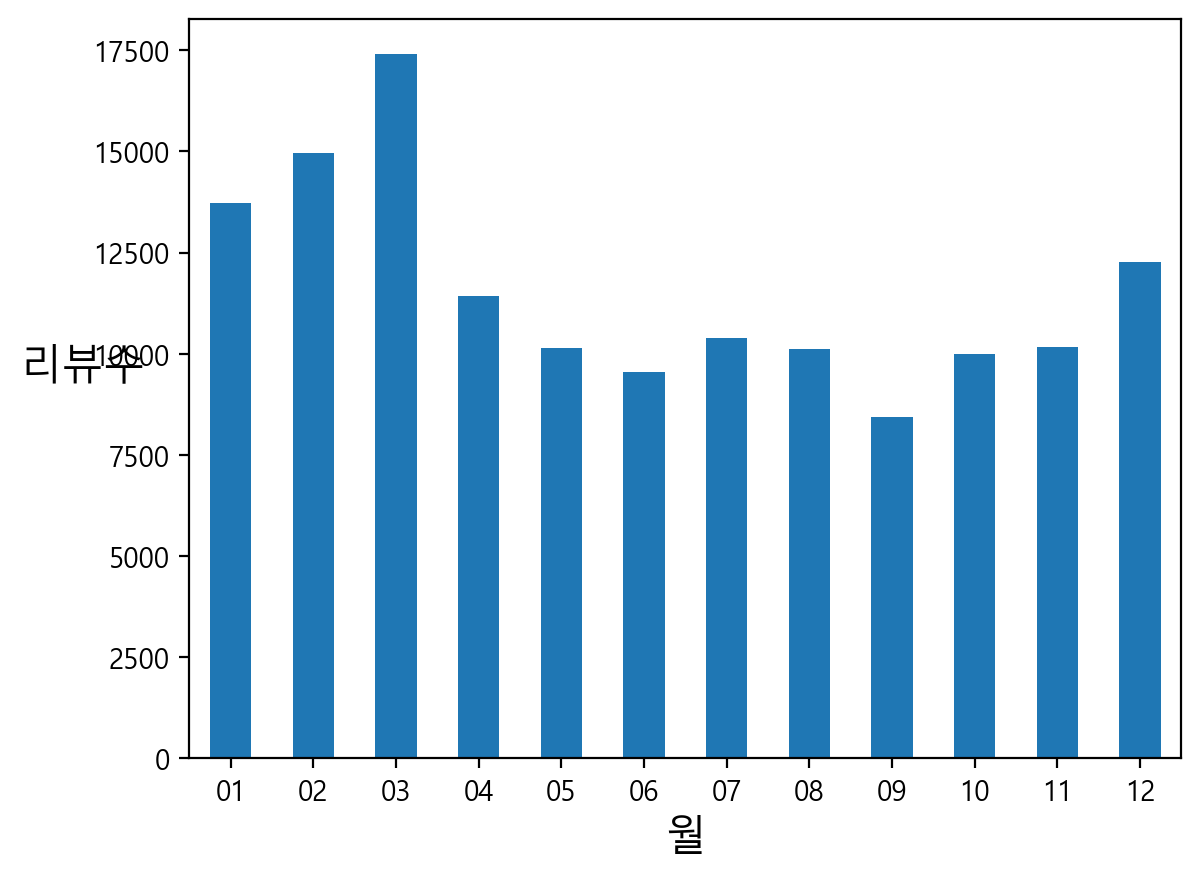

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='Malgun Gothic')
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

df_rvw['month'] = df_rvw['review_date'].apply(lambda x:x[3:5])
df_rvw['month'].value_counts().sort_index().plot.bar()

plt.xticks(rotation=0)
plt.xlabel('월', size=15)
plt.ylabel('리뷰수', size=15, rotation=0)

## 형태소 분석을 이용하여 리뷰에서 의도 찾기

In [ ]:
from kiwipiepy import Kiwi

kiwi = Kiwi()

def find_nouns_verb_adject(text):
    """입력된 문장에서 명사, 동사 추출해 리스트로 반환"""
    tokens = kiwi.tokenize(text)

    target_idxs=[]
    target_words = []
    for idx, wrd in enumerate(tokens):
        if 'NN' in wrd.tag:
            if len(wrd.form) > 1:
                target_words.append(wrd.form)

                target_idxs.append('noun')
        elif wrd.tag.startswith("V"):
            tmp_form = wrd.form + "다"
            target_words.append(tmp_form)
            target_idxs.append('verb')
    return target_words, target_idxs

def find_intension_one_text(words, words_tag):
    """문장 내 의도를 나타내는 단어를 추출한다"""
    intensions = []
    for idx, tag in enumerate(words_tag):
        try:
            if tag == 'verb':
                word = "".join(words[idx-1:idx+1])
                intensions.append(word)
            elif (tag=='noun') and (words_tag[idx+1]!='verb'):
                intensions.append(words[idx])
        except:
            intensions.append(words[idx])
    return intensions

def find_intension(text):
    """입력된 문장에서 의도를 찾아서 반환한다"""
    target_words, target_idxs = find_nouns_verb_adject(text)
    intensions = find_intension_one_text(target_words, target_idxs)
    return " ".join(intensions)

sample_sent = '이번에 출시한 신제품은 촉촉하고 가벼워서 좋아요'
find_intension(sample_sent)

'이번 출시 제품가볍다 가볍다좋다'

In [ ]:
df_rvw['리뷰_의도'] = df_rvw['reviews'].apply(lambda x:find_intension(x))
df_rvw.to_csv(review_path+'makeup_review_fin.csv', index = False)
df_rvw_1 = df_rvw.copy()
df_rvw_1.head(2)

,review_date,review_score,reviews,name,url,price,month,리뷰_의도
0,22.01.02.,평점4,빠른배송과 사은품 감사합니당,8_번제품,https://cr.shopping.naver.com/adcr.nhn?x=6%2Fb...,"28,500",01,배송 사은품 감사
1,21.06.21.,평점5,블랙쿠션 그전꺼도 좋았는데 리뉴얼된것 역시나 넘넘 좋아용!,8_번제품,https://cr.shopping.naver.com/adcr.nhn?x=6%2Fb...,"28,500",06,블랙 쿠션 리뉴얼


In [2]:
import pandas as pd
df_rvw_1 = pd.read_csv('/content/drive/MyDrive/고객 니즈가 보이는 데이터분석/makeup_review_fin.csv')
df_rvw_1.head(2)

,review_date,review_score,reviews,name,url,price,month,리뷰_의도
0,22.01.02.,평점4,빠른배송과 사은품 감사합니당,8_번제품,https://cr.shopping.naver.com/adcr.nhn?x=6%2Fb...,"28,500",1,배송 사은품 감사
1,21.06.21.,평점5,블랙쿠션 그전꺼도 좋았는데 리뉴얼된것 역시나 넘넘 좋아용!,8_번제품,https://cr.shopping.naver.com/adcr.nhn?x=6%2Fb...,"28,500",6,블랙 쿠션좋다 리뉴얼좋다


In [9]:
df_rvw_1 = df_rvw_1[df_rvw_1['reviews']!='없음']

### nGram으로 키워드 파악

In [10]:
def getGram(tokens, n):
    """분절된 단어를 전달하면 nGram을 반환"""
    bigrams = []
    for i in range(0, int(len(tokens))):
        tmp = tokens[i:i+n]
        if len(tmp) > 1:
            bigrams.append(tmp)

    ngram_result = pd.DataFrame(data={'nGram':bigrams})
    ngram_result['nGram'] = ngram_result['nGram'].apply(lambda x:" ".join(x))
    ngram_result = ngram_result['nGram'].value_counts().to_frame()
    ngram_result.reset_index(inplace=True)

    return ngram_result
tokens = " ".join(df_rvw_1['리뷰_의도'].tolist()).split()

bigram_rvw = getGram(tokens=tokens, n=2)

display(bigram_rvw[:20])
display(bigram_rvw[20:40])
display(bigram_rvw[40:60])

,nGram,count
0,배송빠르다 빠르다좋다,1924
1,좋다좋다 좋다좋다,1575
2,쓰다보다 보다좋다,1560
3,마스크묻다 묻다나다,1098
4,피부좋다 좋다보이다,1000
5,쓰다보다 보다않다,928
6,구매 의사있다,856
7,배송 감사,806
8,사용 제품이다,804
9,피부 표현,725


,nGram,count
20,만족쓰다 쓰다있다,466
21,좋다쓰다 쓰다있다,465
22,샘플챙기다 챙기다주다,460
23,묻다나다 나다않다,459
24,여름쓰다 쓰다좋다,459
25,만족 만족,449
26,쓰다보다 보다싶다,444
27,피부 표현예쁘다,444
28,쓰다보다 보다이다,438
29,이다쓰다 쓰다보다,437


,nGram,count
40,지성 피부이다,389
41,건성 피부이다,387
42,수정 화장,382
43,수정 화장하다,364
44,구매 만족,357
45,만족 구매,343
46,쓰다보다 보다괜찮다,343
47,커버 지속좋다,340
48,쿠션 사용,339
49,블랙 쿠션쓰다,339


In [11]:
def print_center_words(center_word, dataframe, column_name, n):
    """특정 단어를 중앙에 위치하고 앞뒤 단어 n개 출력"""
    dataframe[column_name] = dataframe[column_name].astype('str')

    #어절 길이가 1이면 삭제
    review_stpwrds = []
    for review in dataframe[column_name]:
        review_tokens = [token for token in review.split() if len(token) > 1]
        review_join = " ".join(review_tokens)
        review_stpwrds.append(review_join)

    rvws = [rvw for rvw in review_stpwrds if center_word in rvw]

    #앞뒤 n개 단어를 가져온다
    for rvw in rvws:
        rvw_split = rvw.split()
        for idx, token in enumerate(rvw_split):
            if center_word in token:
                front_part = " ".join(rvw_split[idx-n:idx])
                end_part = " ".join(rvw_split[idx+1:idx+n+1])
                joined_parts = front_part + " " + center_word + " " + end_part
                len_joined_parts = joined_parts.split()
                if len(len_joined_parts) == (n*2+1):
                    print("{0}'\x1b[1;31m{1}\x1b[0m'{2}".format(front_part, center_word, end_part))

print_center_words(center_word='좋다', dataframe=df_rvw_1, column_name='리뷰_의도', n=2)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
아니다않다 않다이다'좋다'좋다보이다 적정
않다이다 피부좋다'좋다'적정 매트쓰다
가격사다 사다있다'좋다'립과 하이
얇다발리다 커버있다'좋다'좋다쟁이다 쟁이다놓다
커버있다 있다좋다'좋다'쟁이다놓다 놓다싶다
매트쓰다 광나이다'좋다'좋다보다 보다보이다
비닐벗기다 벗기다쓰다'좋다'좋다이다 이다작다
벗기다쓰다 커버좋다'좋다'이다작다 퍼프닳다
없다않다 않다있다'좋다'휴대좋다 좋다쓰다
않다있다 제품력좋다'좋다'좋다쓰다 구매같다
부족 커버'좋다'커버 부분덧바르다
부분덧바르다 덧바르다주다'좋다'낫츠 구매이다
커버좋다 구매'좋다'하루있다 있다무너지다
기존 사이즈크다'좋다'진주 추출물
쿠션 제품'좋다'좋다하다 소문듣다
제품 커버좋다'좋다'소문듣다 구매
후배거바르다 바르다보다'좋다'구매 기대되다
배송빠르다 포장'좋다'사은품주다 감사
포장예쁘다 예쁘다오다'좋다'덕분 선물
제품이다 건조않다'좋다'건성이다 건조없다
웨어 쿠션'좋다'구매있다 페어노랗다
구매이다 커버좋다'좋다'지다같다 마스크묻다
리뷰보다 구입'좋다'커버좋다 이용하다
구입 사용좋다'좋다'이용하다 하다하다
예쁘다밝다 발림'좋다'좋다아쉽다 주문
발림 커버좋다'좋다'주문 테스트보다
케이스가지다 가지다다니다'좋다'사이즈이다 커버좋다
학생 커버좋다'좋다'쓰다보다 보다두껍다
고가 브랜드'좋다'좋다사다 밀착
브랜드 퀄리티좋다'좋다'밀착 가성비
광고혹하다 혹하다사다'좋다'정착 건조이다
쓰다보다 보다않다'좋다'좋다믿다 믿다쓰다
보다않다 않다좋다'좋다'믿다쓰다 쓰다보다
가격 대비좋다'좋다'쓰다이다 리필오다
핑크 베이지이다'좋다'퍼프 이번
아니다묻다 커버'좋다'좋다쓰다 쓰다같다
쓰다보다 밀착'좋다'배송빠르다 빠르다쓰다
리필있다 상품'좋다'커버뛰어나다 만족
자체 커버'좋다'색상아쉽다 아쉽다밝다
소독약 냄새나다'좋다'마스크묻다 묻다않다
지성 피부이다'좋다'바닐라 색상이다
추천받다 받다사다'좋다'좋다쓰다 쓰다없다
받다사다 고정력좋다'좋다'쓰다없다 없다쓰다
마스크묻다 묻다나오다'좋다'좋다맞

In [12]:
from collections import Counter

rvw_tokens = " ".join(df_rvw_1['리뷰_의도'].tolist()).split()

common_words = Counter(rvw_tokens).most_common()

common_words_dict = {common_words[i][0]:common_words[i][1] for i in range(len(common_words))}

common_words_dict

{'구매': 13379,
 '만족': 12759,
 '쓰다보다': 12535,
 '쿠션': 12080,
 '피부': 9643,
 '커버': 8955,
 '배송빠르다': 8043,
 '사용': 7211,
 '쓰다있다': 7051,
 '커버좋다': 7021,
 '제품이다': 5900,
 '커버되다': 5056,
 '좋다같다': 5050,
 '제품': 4782,
 '감사': 4555,
 '밀착좋다': 4217,
 '자연': 3840,
 '쓰다이다': 3747,
 '마스크묻다': 3619,
 '좋다좋다': 3603,
 '쿠션이다': 3563,
 '이다좋다': 3423,
 '쓰다좋다': 3332,
 '사용이다': 3319,
 '피부이다': 2995,
 '좋다쓰다': 2985,
 '밀착': 2981,
 '사용보다': 2961,
 '쿠션쓰다': 2898,
 '리필': 2738,
 '주문': 2736,
 '좋다하다': 2700,
 '마음들다': 2695,
 '매트': 2610,
 '마스크묻어나다': 2607,
 '않다좋다': 2605,
 '퍼프': 2605,
 '배송': 2573,
 '생각': 2571,
 '보다좋다': 2548,
 '지속좋다': 2542,
 '가격': 2496,
 '사용있다': 2441,
 '느낌이다': 2385,
 '건조': 2378,
 '있다좋다': 2270,
 '케이스': 2250,
 '이다쓰다': 2152,
 '추천': 2139,
 '사다보다': 2095,
 '수정': 2059,
 '건성이다': 2045,
 '지속': 2030,
 '피부좋다': 2024,
 '빠르다좋다': 1968,
 '마스크쓰다': 1952,
 '구입': 1940,
 '마스크': 1908,
 '색상': 1903,
 '블랙': 1886,
 '구매이다': 1882,
 '시간지나다': 1836,
 '화장': 1824,
 '이다하다': 1760,
 '되다좋다': 1706,
 '피부맞다': 1697,
 '팩트': 1683,
 '얼굴': 1635,
 '묻다나다': 1627,
 '되다같다': 

In [13]:
def print_center_words_2(center_word, dataframe, column_name, n):
    """특정 단어를 중앙에 위치하고 앞뒤 단어 n개 출력"""
    dataframe[column_name] = dataframe[column_name].astype('str')

    #어절 길이가 1이면 삭제
    review_stpwrds = []
    for review in dataframe[column_name]:
        review_tokens = [token for token in review.split() if len(token) > 1]
        review_join = " ".join(review_tokens)
        review_stpwrds.append(review_join)

    rvws = [rvw for rvw in review_stpwrds if center_word in rvw]
    #앞뒤 n개 단어를 가져온다
    review_results = []
    for rvw in rvws:
        rvw_split = rvw.split()
        for idx, token in enumerate(rvw_split):
            if center_word in token:
                front_part = " ".join(rvw_split[idx-n:idx])
                end_part = " ".join(rvw_split[idx+1:idx+n+1])
                joined_parts = front_part + " " + center_word + " " + end_part
                len_joined_parts = joined_parts.split()
                if len(len_joined_parts) == (n*2+1):
                    review_results.append(joined_parts)
    #어절 빈도를 계산한다.
    all_words_counts = []
    for result in review_results:
        count = 0
        for t in result.split():
            cnt = common_words_dict[t]
            count += cnt
        all_words_counts.append(count)
    df_count = pd.DataFrame(data={"특정단어_포함한_리뷰":review_results, "빈도":all_words_counts}).sort_values(by="빈도", ascending=False)
    return df_count

In [14]:
df_count = print_center_words_2(center_word="좋다", dataframe=df_rvw_1, column_name='리뷰_의도', n=4)
df_count[:10]

,특정단어_포함한_리뷰,빈도
1694,만족 라이브 방송통하다 구매 좋다 가격저렴하다 만족 사용 구매,61762
10649,이다같다 평소 쿠션 피부 좋다 좋다하다 제품 쿠션 만족,57857
10650,평소 쿠션 피부 표현좋다 좋다 제품 쿠션 만족 쿠션이다,57640
13391,컨실러쓰다 정도 만족 커버되다 좋다 피부 표현되다 구매 만족,57158
13410,피부 피부이다 이다쓰다 쓰다보다 좋다 구매 사은품챙기다 챙기다주다 만족,56495
762,감사쓰다 쿠션 피부 자연올라가다 좋다 좋다같다 구매 구매 건강,55461
3041,쿠션 관심많다 사람이다 이다좋다 좋다 쓰다보다 만족 제품없다 쿠션,54798
20605,쓰다보다 지속좋다 구매 배송빠르다 좋다 퍼프 추가 구매 구매싶다,54697
4949,쿠션 사용 뮤드 쿠션 좋다 밀착되다 아침 쿠션 사용,53802
9302,좋다같다 사용 프라이머 사용 좋다 좋다같다 만족 구매 의사있다,53137


### 머신 러닝을 활용하여 중요한 내용 찾기

In [15]:
import re

def get_digit_only(text):
    """숫자만 추출한다"""
    if text != '없음':
        tmp = re.compile('[0-9]+').findall(str(text))
        result = ''.join(tmp)

        return int(result)
    else:
        return 0
def labeling_review(score):
    """3이상이면 1 반환"""
    if score > 3:
        return 1
    else:
        return 0

df_rvw_1['review_score'] = df_rvw_1['review_score'].apply(lambda x:get_digit_only(x))
df_rvw_1['label'] = df_rvw_1['review_score'].apply(lambda x:labeling_review(x))

df_rvw_1.sample(2)


,review_date,review_score,reviews,name,url,price,month,리뷰_의도,label
52949,19.09.24.,5,피부에 잘먹고 좋아요,443_번제품,https://cr.shopping.naver.com/adcr.nhn?x=2NqWh...,"17,900",9,피부먹다 먹다좋다,1
17599,22.01.08.,5,써본거중에 최고로 커버가 잘되는거같아서\n아주만족합니다,179_번제품,https://cr.shopping.naver.com/adcr.nhn?x=iNHG8...,"12,900",1,쓰다보다 최고 커버되다 되다같다 만족,1


In [16]:
#사용감
use_function = ['커버', '밀착' ,'얇', '사용', '부드', '부들', '매끈', '광채', '간편']

#성분
ingre_function = ['위해', '주의', '성분', '순한', '자극']

#가격
price_function = ['가성', '가격', '할인', '세일']

#마스크
mask_function = ['마스크', '코로니']

#시원함
cool_function = ['여름', '시원', '상큼']

#수분
water_function = ['촉촉', '수분', '보습', '건조', '푸석']

cushion_funcs = [use_function, ingre_function, price_function, mask_function, cool_function, water_function]

def count_func(review, function):
    """리뷰와 기능을 넣으면 기능이 언급된 수를 센다"""
    text_tokens = str(review).split()
    cnt = 0
    for token in text_tokens:
        for f in function:
            if f in token:
                cnt += 1
    return cnt
text = "커버력 좋다 밀착력 가격 가성비 좋다 수분감 있다"
use_cnt = count_func(text, use_function)
print('리뷰에서 사용감 등장 빈도:', use_cnt)

리뷰에서 사용감 등장 빈도: 2


In [18]:
from tqdm import tqdm_notebook

column_names = ['사용감 속성', '성분 속성', '가격 속성', '마스크 속성', '시원함 속성', '수분 속성']
count_df = pd.DataFrame(columns=column_names)

for review in tqdm_notebook(df_rvw_1['리뷰_의도']):
    funcs_cnt = []
    for f in cushion_funcs:
        cnt = count_func(review, f)

        funcs_cnt.append(cnt)
    series = pd.Series(funcs_cnt, index=count_df.columns)
    #count_df = count_df.append(series, ignore_index=True)
    count_df = pd.concat([count_df, series.to_frame().T], ignore_index=True)
count_df.head(2)

<ipython-input-18-77d0cc35e1c0>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for review in tqdm_notebook(df_rvw_1['리뷰_의도']):


  0%|          | 0/138583 [00:00<?, ?it/s]

,사용감 속성,성분 속성,가격 속성,마스크 속성,시원함 속성,수분 속성
0,0,0,0,0,0,0
1,0,0,0,0,0,0


In [ ]:
!pip install ipywidgets

   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.2 MB 3.5 MB/s eta 0:00:01
   --------------------------------- ------ 1.8/2.2 MB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 3.1 MB/s eta 0:00:00

   ------------- -------------------------- 1/3 [jupyterlab_widgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   ---------------------------------------- 3/3 [ipywidgets]




[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
count_df['sum'] = count_df.sum(axis=1)
count_df['name'] = df_rvw_1['name']
count_df['label'] = df_rvw_1['label'].values
count_df = count_df[count_df['sum']!=0]
count_df.sample(3)

,사용감 속성,성분 속성,가격 속성,마스크 속성,시원함 속성,수분 속성,sum,name,label
101630,1,0,0,1,0,0,2,751_번제품,1
119790,0,0,0,0,0,1,1,827_번제품,1
112211,1,0,0,0,0,0,1,779_번제품,1


In [20]:
from sklearn.preprocessing import StandardScaler

count_df = pd.read_csv('/content/drive/MyDrive/고객 니즈가 보이는 데이터분석/data/makeup_review/머신러닝용데이터셋.csv')
scaler = StandardScaler()

scaler.fit(count_df.iloc[:,:-3])

count_data_scaled = scaler.transform(count_df.iloc[:,:-3])
df_count_scaled = pd.DataFrame(count_data_scaled, columns=count_df.iloc[:,:-3].columns)

print("*****각 열 평균값*****")
print(df_count_scaled.mean())
print("\n*****각 열 분산값*****")
print(df_count_scaled.std())

*****각 열 평균값*****
사용감 속성    5.963352e-17
성분 속성     2.160936e-17
가격 속성    -2.992065e-17
마스크 속성    1.994710e-17
시원함 속성   -3.469964e-17
수분 속성     6.939929e-17
dtype: float64

*****각 열 분산값*****
사용감 속성    1.000007
성분 속성     1.000007
가격 속성     1.000007
마스크 속성    1.000007
시원함 속성    1.000007
수분 속성     1.000007
dtype: float64


In [21]:
from scipy.stats import skew
skew_features = df_count_scaled[df_count_scaled.columns].apply((lambda x:skew(x)))
print(skew_features)

사용감 속성    5.439823
성분 속성     8.011518
가격 속성     3.235157
마스크 속성    4.454143
시원함 속성    4.719253
수분 속성     4.831354
dtype: float64


In [23]:
import numpy as np
df_count_scaled[skew_features.index] = np.log1p(df_count_scaled[skew_features.index])

print('성분 열에 저장된 데이터 비대칭 정도 :', skew(df_count_scaled['성분 속성']))
print('사용감 열에 저장된 데이터 비대칭 정도 :', skew(df_count_scaled['사용감 속성']))

성분 열에 저장된 데이터 비대칭 정도 : 3.2148218995737268
사용감 열에 저장된 데이터 비대칭 정도 : -0.5008175228721622


In [25]:
from sklearn.model_selection import train_test_split

df_count_scaled_input = df_count_scaled[['사용감 속성', '성분 속성', '가격 속성', '마스크 속성', '시원함 속성', '수분 속성']]

X_train, X_test, y_train, y_test = train_test_split(df_count_scaled_input, count_df['label'], test_size=0.2, random_state=0)

In [27]:
y_train.value_counts()

,count
label,
1,49751
0,4963


### 오버샘플링
- 부족한 데이터를 증식시켜 데이터 균형을 1:1로 맞추는 방식


In [28]:
!pip install imblearn

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
y_train_over.value_counts()

,count
label,
1,49751
0,49751


## 로지스틱 회귀
- 참과 거짓을 예측하고 판단하는 알고리즘
- 하이퍼파라미터
    - penalty
        - 규제 유형
        - 파라미터의 크기를 제한하는 방법
        - 모델이 복잡해지는 것을 방지
    - C
        - 규제 강도를 조절하는 값

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr_clf = LogisticRegression()

parameter_lr = {"penalty":['l2', 'l1'], "C":[0.001, 0.005, 0.01, 0.1, 1]}

grid_lr = GridSearchCV(lr_clf, param_grid=parameter_lr, scoring='accuracy', cv=5)
grid_lr.fit(X_train_over, y_train_over)

print("최적 하이퍼파라미터 :", grid_lr.best_params_)
print("최고 예측 정확도 :", grid_lr.best_score_)

최적 하이퍼파라미터 : {'C': 1, 'penalty': 'l2'}
최고 예측 정확도 : 0.5368133673745341


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
estimator_lr = grid_lr.best_estimator_
pred = estimator_lr.predict(X_test)

model_accu_score = accuracy_score(y_test, pred)
model_preci_score = precision_score(y_test, pred)
model_recall_score = recall_score(y_test, pred)
model_f1_score = f1_score(y_test, pred)

print("모델 정확도 :", np.round(model_accu_score*100, 3), "%")
print("모델 정밀도 :", np.round(model_preci_score*100, 3), "%")
print("모델 재현율 :", np.round(model_recall_score*100, 3), "%")
print("모델 F1 :", np.round(model_f1_score*100, 3), "%")

모델 정확도 : 39.096 %
모델 정밀도 : 92.122 %
모델 재현율 : 35.978 %
모델 F1 : 51.746 %


/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) 

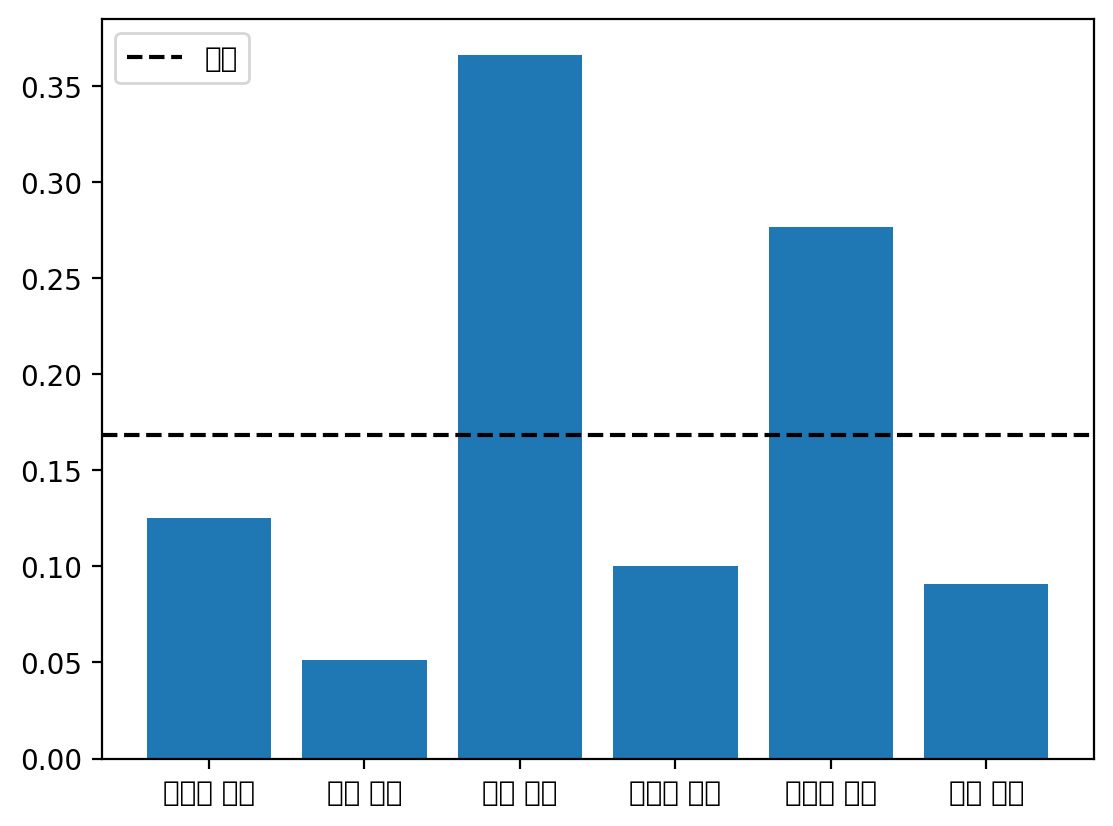

In [38]:
import matplotlib.pyplot as plt

plt.bar(X_train.columns, np.abs(estimator_lr.coef_[0]))
plt.axhline(np.abs(estimator_lr.coef_[0]).mean(), color='k', linestyle='dashed', label='평균')
plt.legend(loc='upper left')

## 의사 결정 트리 모델
- 데이터가 모두 균일하면 지니 계수는 1
- 반대로 균일하게 혼잡하면 지니 계수는 0에 가깝다.
- 지니 계수가 1에 가까운 상황을 찾아서 계속 분리

In [39]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0)
parameter_dt = {"max_depth":[21, 22, 23], "min_samples_split":[2, 3], "min_samples_leaf":[2, 3], "max_features":[4,5,6]}
grid_dt = GridSearchCV(dt_clf, param_grid=parameter_dt, scoring='accuracy' ,cv=5)
grid_dt.fit(X_train_over, y_train_over)

print("최적 하이퍼파라미터 :", grid_dt.best_params_)
print("최적 평균 정확도 :", grid_dt.best_score_)

최적 하이퍼파라미터 : {'max_depth': 23, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}
최적 평균 정확도 : 0.5682801182435973


In [40]:
estimator_dt = grid_dt.best_estimator_
pred_dt = estimator_dt.predict(X_test)
model_accu_score_dt = accuracy_score(y_test, pred_dt)
model_preci_score_dt = precision_score(y_test, pred_dt)
model_recall_score_dt = recall_score(y_test, pred_dt)
model_f1_score_dt = f1_score(y_test, pred_dt)

print("DT 모델 정확도 :", np.round(model_accu_score_dt*100, 3), "%")
print("DT 모델 정밀도 :", np.round(model_preci_score_dt*100, 3), "%")
print("DT 모델 재현율 :", np.round(model_recall_score_dt*100, 3), "%")
print("DT 모델 F1 :", np.round(model_f1_score_dt*100, 3), "%")

DT 모델 정확도 : 42.796 %
DT 모델 정밀도 : 92.407 %
DT 모델 재현율 : 40.287 %
DT 모델 F1 : 56.111 %


<BarContainer object of 6 artists>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans Mono.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans Mono.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from font(s) DejaVu Sans Mono.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from font(s) DejaVu Sans Mono.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans Mono.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48516 (

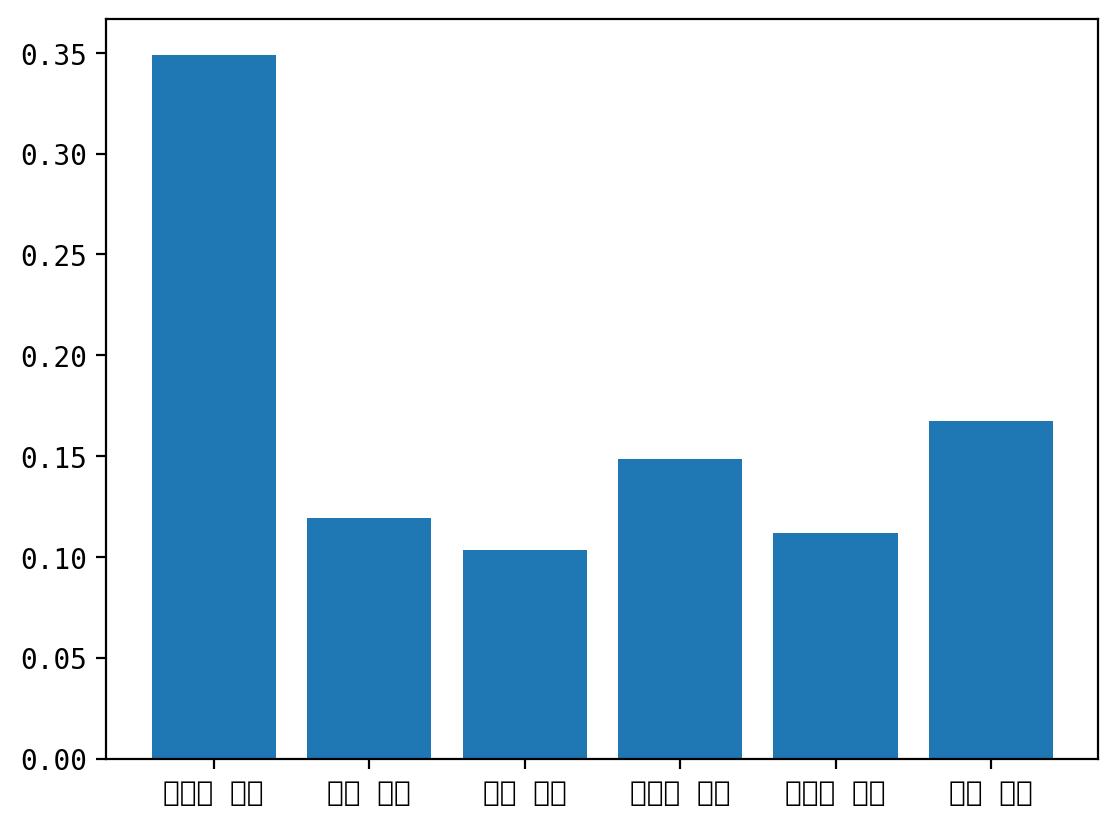

In [43]:
plt.bar(X_train.columns, estimator_dt.feature_importances_)

## 랜덤포레스트


In [44]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(min_samples_split=2, min_samples_leaf=2)

parameter_rf = {"max_depth":[28, 30, 32], "n_estimators":[400, 800, 1200]}
grid_rf = GridSearchCV(rf_clf, param_grid=parameter_rf, scoring='accuracy', cv=5)
grid_rf.fit(X_train_over, y_train_over)

print('최적 하이퍼파라미터 :', grid_rf.best_params_)
print("최적 평균 정확도 :", grid_rf.best_score_)


최적 하이퍼파라미터 : {'max_depth': 30, 'n_estimators': 1200}
최적 평균 정확도 : 0.5692449312539282


In [45]:
estimator_rf = grid_rf.best_estimator_
pred_rf = estimator_rf.predict(X_test)
model_accu_score_rf = accuracy_score(y_test, pred_rf)
model_preci_score_rf = precision_score(y_test, pred_rf)
model_recall_score_rf = recall_score(y_test, pred_rf)
model_f1_score_rf = f1_score(y_test, pred_rf)

print("RF 모델 정확도 :", np.round(model_accu_score_rf*100, 3), "%")
print("RF 모델 정밀도 :", np.round(model_preci_score_rf*100, 3), "%")
print("RF 모델 재현율 :", np.round(model_recall_score_rf*100, 3), "%")
print("RF 모델 F1 :", np.round(model_f1_score_rf*100, 3), "%")


RF 모델 정확도 : 43.029 %
RF 모델 정밀도 : 92.343 %
RF 모델 재현율 : 40.601 %
RF 모델 F1 : 56.403 %


<BarContainer object of 6 artists>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans Mono.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans Mono.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from font(s) DejaVu Sans Mono.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from font(s) DejaVu Sans Mono.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans Mono.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48516 (

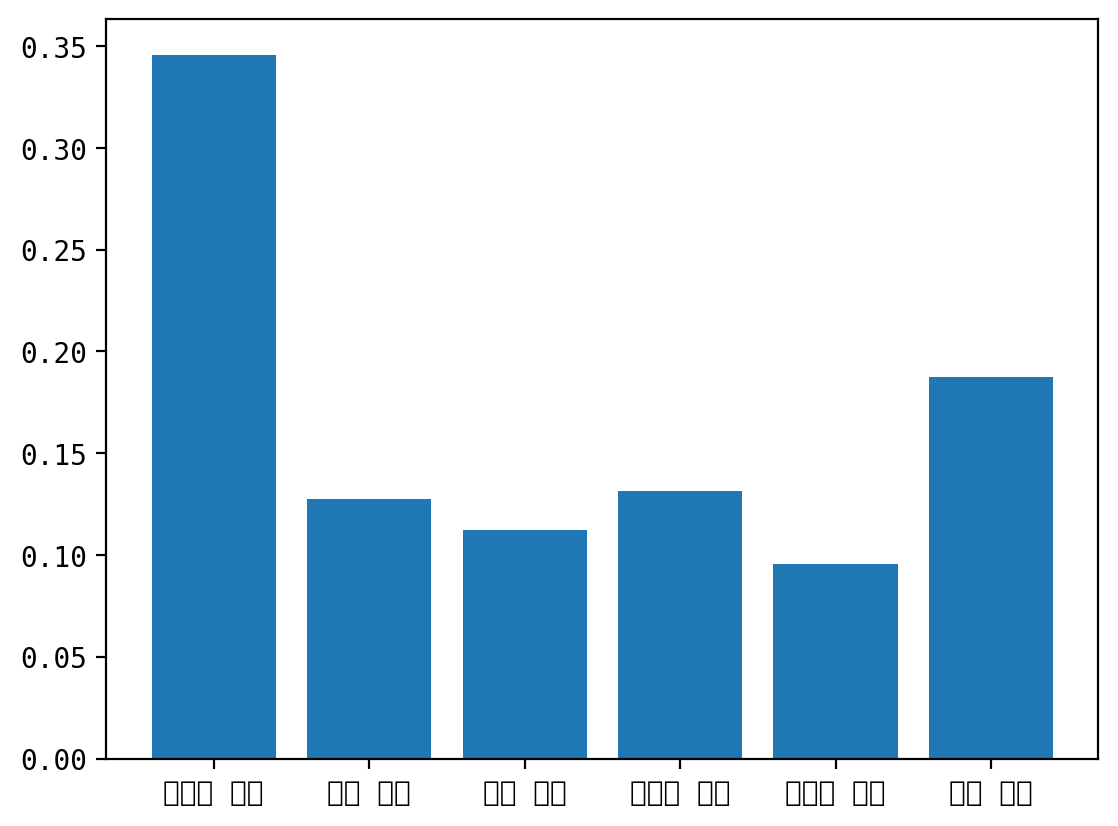

In [46]:
plt.bar(X_train.columns, estimator_rf.feature_importances_)